# Inter-hemispheric Asymmetry Index
* Wenchang Yang (wenchang@princeton.edu)
* Department of Geoscience, Princeton University

In [3]:
from lib.util import year_shift
import xlearn
import seaborn as sns


%matplotlib notebook

In [1]:
# data
land_mask = xr.open_dataset('/tigress/wenchang/MODEL_OUT/CTL1860_noleap_tigercpu_intelmpi_18_576PE/POSTP/00010101.atmos_month.nc') \
    .land_mask.rename({'grid_xt': 'lon', 'grid_yt': 'lat'})

/tigress/wenchang/miniconda3/lib/python3.6/site-packages/xarray/coding/times.py:132: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using dummy cftime.datetime objects instead, reason: dates out of range
  enable_cftimeindex)
/tigress/wenchang/miniconda3/lib/python3.6/site-packages/xarray/coding/variables.py:66: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using dummy cftime.datetime objects instead, reason: dates out of range
  return self.func(self.array[key])


<IPython.core.display.Javascript object>


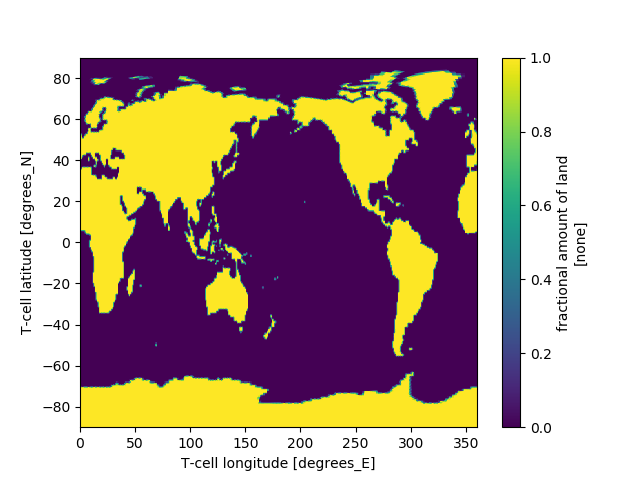

In [85]:
land_mask.plot()

In [93]:
# data
if 'das' in globals() or 'das' in locals():
    pass
else:
    das = dict()

volcs = ['Agung', 'StMaria', 'Pinatubo', 'Chichon']
years = [1963, 1902, 1991, 1982]

# non-nudged
datanames = ('t_surf', 'precip')
for dataname in datanames:
    # volc
    ifiles = [f'data/{volc}_PI_ens_noleap.atmos_month.{dataname}.nc'
             for volc in volcs]
    for volc, ifile in zip(volcs, ifiles):
        key = f'{volc}_{dataname}'
        if key in das.keys():
            print('\t[Exists]:', key)
        else:
            print(key)
            da = xr.open_dataarray(ifile).geo.fldmean()
            das[key] = da

        # NH 
        key_ = key + '_nh'
        if key_ in das.keys():
            print('\t[Exists]:', key_)
        else:
            print(key_)
            da = xr.open_dataarray(ifile).sel(lat=slice(0,90)).geo.fldmean()
            das[key_] = da


        # SH
        key_ = key + '_sh'
        if key_ in das.keys():
            print('\t[Exists]:', key_)
        else:
            print(key_)
            da = xr.open_dataarray(ifile).sel(lat=slice(-90,0)).geo.fldmean()
            das[key_] = da
        
        # global land 
        key_ = key + '_land'
        if key_ in das.keys():
            print('\t[Exists]:', key_)
        else:
            print(key_)
            da = xr.open_dataarray(ifile).where(land_mask>0.5).geo.fldmean()
            das[key_] = da

        # NH land
        key_ = key + '_nhland'
        if key_ in das.keys():
            print('\t[Exists]:', key_)
        else:
            print(key_)
            da = xr.open_dataarray(ifile).where(land_mask>0.5).sel(lat=slice(0,90)).geo.fldmean()
            das[key_] = da

        # SH land
        key_ = key + '_shland'
        if key_ in das.keys():
            print('\t[Exists]:', key_)
        else:
            print(key_)
            da = xr.open_dataarray(ifile).where(land_mask>0.5).sel(lat=slice(-60,0)).geo.fldmean()
            das[key_] = da


    # ctl
    ifile = f'data/CTL1860_noleap_tigercpu_intelmpi_18_576PE.atmos_month.{dataname}.nc'
    for volc, year in zip(volcs, years):
        key = f'{volc}_ctl_{dataname}'
        if key in das.keys():
            print('\t[Exists]:', key)
        else:
            print(key)
            da = xr.open_dataarray(ifile).geo.fldmean()
            da = year_shift(da, n=year-1, to_datetime=True)
            das[key] = da

        # NH 
        key_ = key + '_nh'
        if key_ in das.keys():
            print('\t[Exists]:', key_)
        else:
            print(key_)
            da = xr.open_dataarray(ifile).sel(lat=slice(0,90)).geo.fldmean()
            da = year_shift(da, n=year-1, to_datetime=True)
            das[key_] = da

        # SH
        key_ = key + '_sh'
        if key_ in das.keys():
            print('\t[Exists]:', key_)
        else:
            print(key_)
            da = xr.open_dataarray(ifile).sel(lat=slice(-90,0)).geo.fldmean()
            da = year_shift(da, n=year-1, to_datetime=True)
            das[key_] = da
        
        # global land 
        key_ = key + '_land'
        if key_ in das.keys():
            print('\t[Exists]:', key_)
        else:
            print(key_)
            da = xr.open_dataarray(ifile).where(land_mask>0.5).geo.fldmean()
            da = year_shift(da, n=year-1, to_datetime=True)
            das[key_] = da

        # NH land
        key_ = key + '_nhland'
        if key_ in das.keys():
            print('\t[Exists]:', key_)
        else:
            print(key_)
            da = xr.open_dataarray(ifile).where(land_mask>0.5).sel(lat=slice(0,90)).geo.fldmean()
            da = year_shift(da, n=year-1, to_datetime=True)
            das[key_] = da

        # SH land
        key_ = key + '_shland'
        if key_ in das.keys():
            print('\t[Exists]:', key_)
        else:
            print(key_)
            da = xr.open_dataarray(ifile).where(land_mask>0.5).sel(lat=slice(-60,0)).geo.fldmean()
            da = year_shift(da, n=year-1, to_datetime=True)
            das[key_] = da



	[Exists]: Agung_t_surf
	[Exists]: Agung_t_surf_nh
	[Exists]: Agung_t_surf_sh
	[Exists]: Agung_t_surf_land
	[Exists]: Agung_t_surf_nhland
Agung_t_surf_shland
	[Exists]: StMaria_t_surf
	[Exists]: StMaria_t_surf_nh
	[Exists]: StMaria_t_surf_sh
	[Exists]: StMaria_t_surf_land
	[Exists]: StMaria_t_surf_nhland
StMaria_t_surf_shland
	[Exists]: Pinatubo_t_surf
	[Exists]: Pinatubo_t_surf_nh
	[Exists]: Pinatubo_t_surf_sh
	[Exists]: Pinatubo_t_surf_land
	[Exists]: Pinatubo_t_surf_nhland
Pinatubo_t_surf_shland
	[Exists]: Chichon_t_surf
	[Exists]: Chichon_t_surf_nh
	[Exists]: Chichon_t_surf_sh
	[Exists]: Chichon_t_surf_land
	[Exists]: Chichon_t_surf_nhland
Chichon_t_surf_shland
	[Exists]: Agung_ctl_t_surf
	[Exists]: Agung_ctl_t_surf_nh
	[Exists]: Agung_ctl_t_surf_sh
	[Exists]: Agung_ctl_t_surf_land
	[Exists]: Agung_ctl_t_surf_nhland
Agung_ctl_t_surf_shland


/tigress/wenchang/miniconda3/lib/python3.6/site-packages/xarray/coding/times.py:132: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using dummy cftime.datetime objects instead, reason: dates out of range
  enable_cftimeindex)
/tigress/wenchang/miniconda3/lib/python3.6/site-packages/xarray/coding/variables.py:66: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using dummy cftime.datetime objects instead, reason: dates out of range
  return self.func(self.array[key])


	[Exists]: StMaria_ctl_t_surf
	[Exists]: StMaria_ctl_t_surf_nh
	[Exists]: StMaria_ctl_t_surf_sh
	[Exists]: StMaria_ctl_t_surf_land
	[Exists]: StMaria_ctl_t_surf_nhland
StMaria_ctl_t_surf_shland


/tigress/wenchang/miniconda3/lib/python3.6/site-packages/xarray/coding/times.py:132: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using dummy cftime.datetime objects instead, reason: dates out of range
  enable_cftimeindex)
/tigress/wenchang/miniconda3/lib/python3.6/site-packages/xarray/coding/variables.py:66: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using dummy cftime.datetime objects instead, reason: dates out of range
  return self.func(self.array[key])


	[Exists]: Pinatubo_ctl_t_surf
	[Exists]: Pinatubo_ctl_t_surf_nh
	[Exists]: Pinatubo_ctl_t_surf_sh
	[Exists]: Pinatubo_ctl_t_surf_land
	[Exists]: Pinatubo_ctl_t_surf_nhland
Pinatubo_ctl_t_surf_shland


/tigress/wenchang/miniconda3/lib/python3.6/site-packages/xarray/coding/times.py:132: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using dummy cftime.datetime objects instead, reason: dates out of range
  enable_cftimeindex)
/tigress/wenchang/miniconda3/lib/python3.6/site-packages/xarray/coding/variables.py:66: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using dummy cftime.datetime objects instead, reason: dates out of range
  return self.func(self.array[key])


	[Exists]: Chichon_ctl_t_surf
	[Exists]: Chichon_ctl_t_surf_nh
	[Exists]: Chichon_ctl_t_surf_sh
	[Exists]: Chichon_ctl_t_surf_land
	[Exists]: Chichon_ctl_t_surf_nhland
Chichon_ctl_t_surf_shland


/tigress/wenchang/miniconda3/lib/python3.6/site-packages/xarray/coding/times.py:132: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using dummy cftime.datetime objects instead, reason: dates out of range
  enable_cftimeindex)
/tigress/wenchang/miniconda3/lib/python3.6/site-packages/xarray/coding/variables.py:66: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using dummy cftime.datetime objects instead, reason: dates out of range
  return self.func(self.array[key])


	[Exists]: Agung_precip
	[Exists]: Agung_precip_nh
	[Exists]: Agung_precip_sh
	[Exists]: Agung_precip_land
	[Exists]: Agung_precip_nhland
Agung_precip_shland
	[Exists]: StMaria_precip
	[Exists]: StMaria_precip_nh
	[Exists]: StMaria_precip_sh
	[Exists]: StMaria_precip_land
	[Exists]: StMaria_precip_nhland
StMaria_precip_shland
	[Exists]: Pinatubo_precip
	[Exists]: Pinatubo_precip_nh
	[Exists]: Pinatubo_precip_sh
	[Exists]: Pinatubo_precip_land
	[Exists]: Pinatubo_precip_nhland
Pinatubo_precip_shland
	[Exists]: Chichon_precip
	[Exists]: Chichon_precip_nh
	[Exists]: Chichon_precip_sh
	[Exists]: Chichon_precip_land
	[Exists]: Chichon_precip_nhland
Chichon_precip_shland
	[Exists]: Agung_ctl_precip
	[Exists]: Agung_ctl_precip_nh
	[Exists]: Agung_ctl_precip_sh
	[Exists]: Agung_ctl_precip_land
	[Exists]: Agung_ctl_precip_nhland
Agung_ctl_precip_shland


/tigress/wenchang/miniconda3/lib/python3.6/site-packages/xarray/coding/times.py:132: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using dummy cftime.datetime objects instead, reason: dates out of range
  enable_cftimeindex)
/tigress/wenchang/miniconda3/lib/python3.6/site-packages/xarray/coding/variables.py:66: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using dummy cftime.datetime objects instead, reason: dates out of range
  return self.func(self.array[key])


	[Exists]: StMaria_ctl_precip
	[Exists]: StMaria_ctl_precip_nh
	[Exists]: StMaria_ctl_precip_sh
	[Exists]: StMaria_ctl_precip_land
	[Exists]: StMaria_ctl_precip_nhland
StMaria_ctl_precip_shland


/tigress/wenchang/miniconda3/lib/python3.6/site-packages/xarray/coding/times.py:132: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using dummy cftime.datetime objects instead, reason: dates out of range
  enable_cftimeindex)
/tigress/wenchang/miniconda3/lib/python3.6/site-packages/xarray/coding/variables.py:66: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using dummy cftime.datetime objects instead, reason: dates out of range
  return self.func(self.array[key])


	[Exists]: Pinatubo_ctl_precip
	[Exists]: Pinatubo_ctl_precip_nh
	[Exists]: Pinatubo_ctl_precip_sh
	[Exists]: Pinatubo_ctl_precip_land
	[Exists]: Pinatubo_ctl_precip_nhland
Pinatubo_ctl_precip_shland


/tigress/wenchang/miniconda3/lib/python3.6/site-packages/xarray/coding/times.py:132: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using dummy cftime.datetime objects instead, reason: dates out of range
  enable_cftimeindex)
/tigress/wenchang/miniconda3/lib/python3.6/site-packages/xarray/coding/variables.py:66: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using dummy cftime.datetime objects instead, reason: dates out of range
  return self.func(self.array[key])


	[Exists]: Chichon_ctl_precip
	[Exists]: Chichon_ctl_precip_nh
	[Exists]: Chichon_ctl_precip_sh
	[Exists]: Chichon_ctl_precip_land
	[Exists]: Chichon_ctl_precip_nhland
Chichon_ctl_precip_shland


/tigress/wenchang/miniconda3/lib/python3.6/site-packages/xarray/coding/times.py:132: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using dummy cftime.datetime objects instead, reason: dates out of range
  enable_cftimeindex)
/tigress/wenchang/miniconda3/lib/python3.6/site-packages/xarray/coding/variables.py:66: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using dummy cftime.datetime objects instead, reason: dates out of range
  return self.func(self.array[key])


In [46]:
# data
ncfile = '/tigress/wenchang/data/cru/cru_ts4.01.1901.2016.pre.dat.nc'
data_name = 'pre'
ds = xr.open_dataset(ncfile)
da = ds[data_name]
# anomaly from clim
da_clim = da.groupby('time.month').mean('time')
da = da.groupby('time.month') - da_clim
da = da.resample(time='MS').mean('time')
das['cru_pra'] = da

In [68]:
# data
ncfile = '/tigress/wenchang/data/cru/cru_ts4.01.1901.2016.tmp.dat.nc'
data_name = 'tmp'
ds = xr.open_dataset(ncfile)
da = ds[data_name]
# anomaly from clim
da_clim = da.groupby('time.month').mean('time')
da = da.groupby('time.month') - da_clim
da = da.resample(time='MS').mean('time')
das['cru_tsa'] = da

<IPython.core.display.Javascript object>


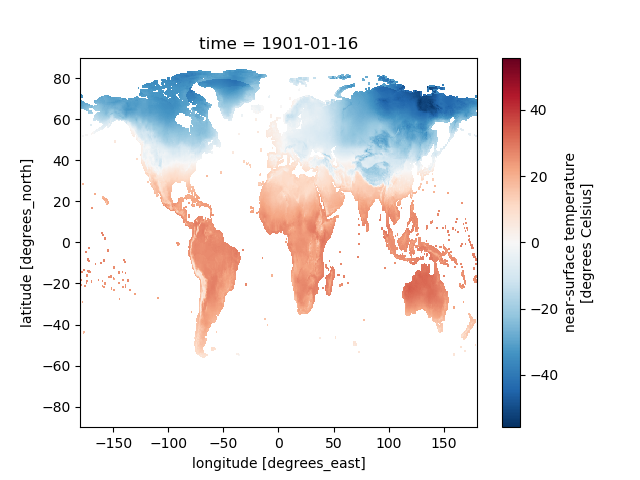

In [84]:
ds.tmp.isel(time=0).plot()

In [47]:
# data, NINO3.4
nino34 = open_dataset('https://iridl.ldeo.columbia.edu/SOURCES/.Indices/.nino/.EXTENDED/.NINO34/dods') \
    .NINO34 \
    .rename({'T': 'time'}) \
    .sel(time=slice('1901', '2016')) \
    .resample(time='MS').mean('time')
    
nino34

[decode_times=False]: times is decoded externally.


<xarray.DataArray 'NINO34' (time: 1392)>
array([ 0.6677  ,  0.32725 ,  0.0377  , ..., -0.539678, -0.298363, -0.231083])
Coordinates:
  * time     (time) datetime64[ns] 1901-01-01 1901-02-01 1901-03-01 ...

In [48]:
# remove ENSO
r = das['cru_pra'].learn.regress(nino34)
da_res = das['cru_pra'] - r.coef_da * nino34
das['cru_pra_res'] = da_res

//home/wenchang/wython/xlearn/linear_model.py:129: RuntimeWarning: divide by zero encountered in true_divide
  t = self.coef_ / se
//home/wenchang/wython/xlearn/linear_model.py:129: RuntimeWarning: invalid value encountered in true_divide
  t = self.coef_ / se
/tigress/wenchang/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/tigress/wenchang/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/tigress/wenchang/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1738: RuntimeWarning: invalid value encountered in greater_equal
  cond2 = (x >= self.b) & cond0


In [69]:
# remove ENSO
r = das['cru_tsa'].learn.regress(nino34)
da_res = das['cru_tsa'] - r.coef_da * nino34
das['cru_tsa_res'] = da_res

In [38]:
def cal_asym_index(da, year_erupt, global_mean=None, full_return=False):
    years_before = slice(f'{year_erupt - 5}', f'{year_erupt - 1}')
    years_after = slice(f'{year_erupt}', f'{year_erupt + 4}')
    
    da_ref = da.sel(time=years_before).groupby('time.month').mean('time')
    daa = da.sel(time=years_after).groupby('time.month') - da_ref # anomaly
    daa_nh = daa.sel(lat=slice(0, 90)).geo.fldmean().sum('time')/12
    daa_sh = daa.sel(lat=slice(-90,0)).geo.fldmean().sum('time')/12
    
    if global_mean is None:
        daa_global = daa.geo.fldmean().sum('time')/12
    else:
        daa_global = global_mean
        
    if full_return:
        return daa_global.item(), daa_nh.item(), daa_sh.item()
    else:
        return (daa_nh - daa_sh)/daa_global

In [21]:
volcs = ('StMaria', 'Novarupta', 'Agung', 'ElChichon', 'Pinatubo')
years = (1902, 1912, 1963, 1982, 1991)
for volc, year in zip(volcs, years):
    print(volc, cal_asym_index(das['cru_pra_res'], year).item())

StMaria 2.6062335174987363
Novarupta -0.1849404688190386
Agung -2.090723586542266
ElChichon 0.20964275981623606
Pinatubo -6.0731409370994625


In [71]:
volcs = ('StMaria', 'Novarupta', 'Agung', 'ElChichon', 'Pinatubo')
years = (1902, 1912, 1963, 1982, 1991)
for volc, year in zip(volcs, years):
    print(volc, cal_asym_index(das['cru_tsa_res'], year).item())

StMaria 0.13992290724313527
Novarupta -1.2611339077277643
Agung 0.607022575021299
ElChichon 2.2830610925711596
Pinatubo -1.0312065604039187


In [50]:
volcs = ('StMaria', 'Novarupta', 'Agung', 'ElChichon', 'Pinatubo')
years = (1902, 1912, 1963, 1982, 1991)
for volc, year in zip(volcs, years):
    print(volc, cal_asym_index(das['cru_pra_res'], year, full_return=True) )

StMaria (4.216445304816808, 7.089979932363323, -3.8990611457504176)
Novarupta (3.3206415202035178, 3.1600544457628525, 3.774175445289256)
Agung (-1.8615409387796833, -0.8438267052057644, -4.735794253226481)
ElChichon (-5.520097189324129, -5.822707158013807, -4.665458748790049)
Pinatubo (-1.7870519566514897, 1.0509139722026946, -9.802104422461161)


In [70]:
volcs = ('StMaria', 'Novarupta', 'Agung', 'ElChichon', 'Pinatubo')
years = (1902, 1912, 1963, 1982, 1991)
for volc, year in zip(volcs, years):
    print(volc, cal_asym_index(das['cru_tsa_res'], year, full_return=True) )

StMaria (-1.531131342951836, -1.5871532521192835, -1.3729129032423766)
Novarupta (0.3397294724678089, 0.22769515686259642, 0.6561395140462162)
Agung (-0.8489248872395265, -0.9836754992847464, -0.4683589282329432)
ElChichon (-0.34624034808289356, -0.5529457597237765, 0.23754210766257308)
Pinatubo (-0.11363051290492392, -0.08298991240489778, -0.20016644277451748)


## Figs

### asymmetry index: Ts

<IPython.core.display.Javascript object>


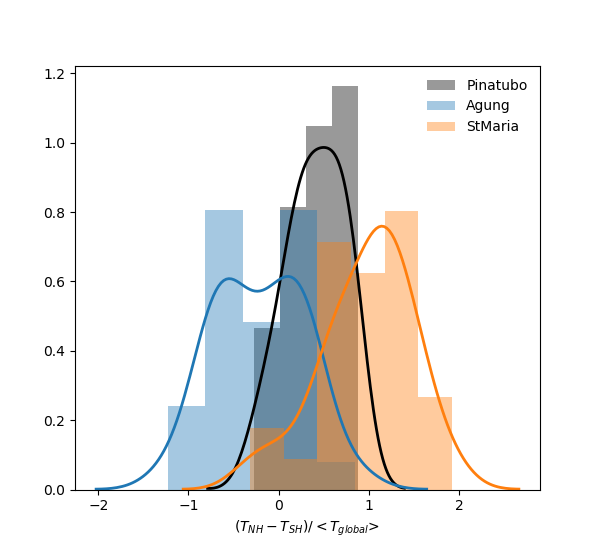

/tigress/wenchang/miniconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


In [5]:
# plot
fig, ax = plt.subplots(figsize=(6, 5.5))
alpha = .5
n_years = 5
# bins = np.arange()
# xmin, xmax = -2, 0
# ymin, ymax = -6.5, 0

# 
volc = 'Pinatubo'
color = 'k'

dataname = 't_surf'
keyv, keyc = f'{volc}_{dataname}', f'{volc}_ctl_{dataname}'
da = ( das[keyv] - das[keyc] ).isel(time=slice(0, n_years*12)).sum('time')/12
da_nh = ( das[keyv+'_nh'] - das[keyc+'_nh'] ).isel(time=slice(0, n_years*12)).sum('time')/12
da_sh = ( das[keyv+'_sh'] - das[keyc+'_sh'] ).isel(time=slice(0, n_years*12)).sum('time')/12
da = (da_nh - da_sh)/da.mean()

# da.plot.hist(color=color, alpha=alpha)
sns.distplot(da, color=color, label=volc)

volc = 'Agung'
color = 'k'

dataname = 't_surf'
keyv, keyc = f'{volc}_{dataname}', f'{volc}_ctl_{dataname}'
da = ( das[keyv] - das[keyc] ).isel(time=slice(0, n_years*12)).sum('time')/12
da_nh = ( das[keyv+'_nh'] - das[keyc+'_nh'] ).isel(time=slice(0, n_years*12)).sum('time')/12
da_sh = ( das[keyv+'_sh'] - das[keyc+'_sh'] ).isel(time=slice(0, n_years*12)).sum('time')/12
da = (da_nh - da_sh)/da.mean()

# da.plot.hist(alpha=alpha)
sns.distplot(da, label=volc)


volc = 'StMaria'
color = 'k'

dataname = 't_surf'
keyv, keyc = f'{volc}_{dataname}', f'{volc}_ctl_{dataname}'
da = ( das[keyv] - das[keyc] ).isel(time=slice(0, n_years*12)).sum('time')/12
da_nh = ( das[keyv+'_nh'] - das[keyc+'_nh'] ).isel(time=slice(0, n_years*12)).sum('time')/12
da_sh = ( das[keyv+'_sh'] - das[keyc+'_sh'] ).isel(time=slice(0, n_years*12)).sum('time')/12
da = (da_nh - da_sh)/da.mean()

# da.plot.hist(alpha=alpha)
sns.distplot(da, label=volc)

ax.autoscale()
plt.legend()
s = '$(T_{NH} - T_{SH})/<T_{global}$>'
plt.xlabel(s)

figname = f'figs/fig_scatter_NF_vs_Ts_years1to{n_years}.pdf'
# plt.savefig(figname)

<IPython.core.display.Javascript object>


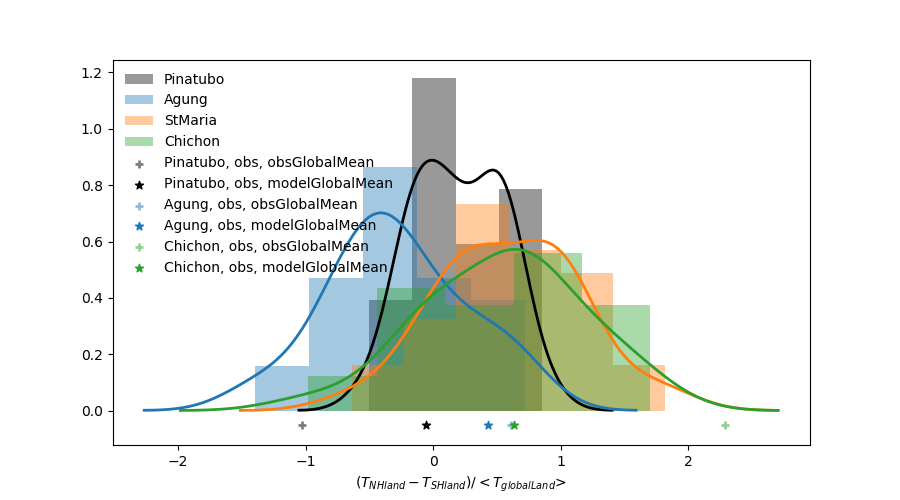

/tigress/wenchang/miniconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/tigress/wenchang/miniconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/tigress/wenchang/miniconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional i

In [98]:
# plot, land only
fig, ax = plt.subplots(figsize=(9, 5))
alpha = .5
n_years = 5
# bins = np.arange()
# xmin, xmax = -2, 0
# ymin, ymax = -6.5, 0

# 
volc = 'Pinatubo'
color = 'k'

dataname = 't_surf'
keyv, keyc = f'{volc}_{dataname}', f'{volc}_ctl_{dataname}'
da_g = ( das[keyv+'_land'] - das[keyc+'_land'] ).isel(time=slice(0, n_years*12)).sum('time')/12
da_nh = ( das[keyv+'_nhland'] - das[keyc+'_nhland'] ).isel(time=slice(0, n_years*12)).sum('time')/12
da_sh = ( das[keyv+'_shland'] - das[keyc+'_shland'] ).isel(time=slice(0, n_years*12)).sum('time')/12
da = (da_nh - da_sh)/da_g.mean()

# da.plot.hist(color=color, alpha=alpha)
sns.distplot(da, color=color, label=volc)
# plt.axvline(da.mean(), color=color, ls='--', alpha=alpha)
da_obs, year = das['cru_tsa_res'], 1991
asymi = cal_asym_index(da_obs, year)
plt.scatter(asymi, -0.05, marker='+', color=color, label=f'{volc}, obs, obsGlobalMean', alpha=alpha)
asymi = cal_asym_index(da_obs, year, global_mean=da_g.mean())
plt.scatter(asymi, -0.05, marker='*', color=color, label=f'{volc}, obs, modelGlobalMean')

volc = 'Agung'
color = 'C0'

dataname = 't_surf'
keyv, keyc = f'{volc}_{dataname}', f'{volc}_ctl_{dataname}'
da_g = ( das[keyv+'_land'] - das[keyc+'_land'] ).isel(time=slice(0, n_years*12)).sum('time')/12
da_nh = ( das[keyv+'_nhland'] - das[keyc+'_nhland'] ).isel(time=slice(0, n_years*12)).sum('time')/12
da_sh = ( das[keyv+'_shland'] - das[keyc+'_shland'] ).isel(time=slice(0, n_years*12)).sum('time')/12
da = (da_nh - da_sh)/da_g.mean()

# da.plot.hist(alpha=alpha)
sns.distplot(da, color=color, label=volc)
# plt.axvline(da.mean(), color=color, ls='--', alpha=alpha)
da_obs, year = das['cru_tsa_res'], 1963
asymi = cal_asym_index(da_obs, year)
plt.scatter(asymi, -0.05, marker='+', color=color, label=f'{volc}, obs, obsGlobalMean', alpha=alpha)
asymi = cal_asym_index(da_obs, year, global_mean=da_g.mean())
plt.scatter(asymi, -0.05, marker='*', color=color, label=f'{volc}, obs, modelGlobalMean')


volc = 'StMaria'
color = 'C1'

dataname = 't_surf'
keyv, keyc = f'{volc}_{dataname}', f'{volc}_ctl_{dataname}'
da_g = ( das[keyv+'_land'] - das[keyc+'_land'] ).isel(time=slice(0, n_years*12)).sum('time')/12
da_nh = ( das[keyv+'_nhland'] - das[keyc+'_nhland'] ).isel(time=slice(0, n_years*12)).sum('time')/12
da_sh = ( das[keyv+'_shland'] - das[keyc+'_shland'] ).isel(time=slice(0, n_years*12)).sum('time')/12
da = (da_nh - da_sh)/da_g.mean()

# da.plot.hist(alpha=alpha)
sns.distplot(da, label=volc, color=color)

volc = 'Chichon'
color = 'C2'

dataname = 't_surf'
keyv, keyc = f'{volc}_{dataname}', f'{volc}_ctl_{dataname}'
da_g = ( das[keyv+'_land'] - das[keyc+'_land'] ).isel(time=slice(0, n_years*12)).sum('time')/12
da_nh = ( das[keyv+'_nhland'] - das[keyc+'_nhland'] ).isel(time=slice(0, n_years*12)).sum('time')/12
da_sh = ( das[keyv+'_shland'] - das[keyc+'_shland'] ).isel(time=slice(0, n_years*12)).sum('time')/12
da = (da_nh - da_sh)/da_g.mean()

# da.plot.hist(alpha=alpha)
sns.distplot(da, color=color, label=volc)
# plt.axvline(da.mean(), color=color, ls='--', alpha=alpha)
da_obs, year = das['cru_tsa_res'], 1982
asymi = cal_asym_index(da_obs, year)
plt.scatter(asymi, -0.05, marker='+', color=color, label=f'{volc}, obs, obsGlobalMean', alpha=alpha)
asymi = cal_asym_index(da_obs, year, global_mean=da_g.mean())
plt.scatter(asymi, -0.05, marker='*', color=color, label=f'{volc}, obs, modelGlobalMean')

ax.autoscale()
plt.legend()
s = '$(T_{NHland} - T_{SHland})/<T_{globalLand}$>'
plt.xlabel(s)

figname = f'figs/fig_scatter_NF_vs_Ts_years1to{n_years}.pdf'
# plt.savefig(figname)

<IPython.core.display.Javascript object>


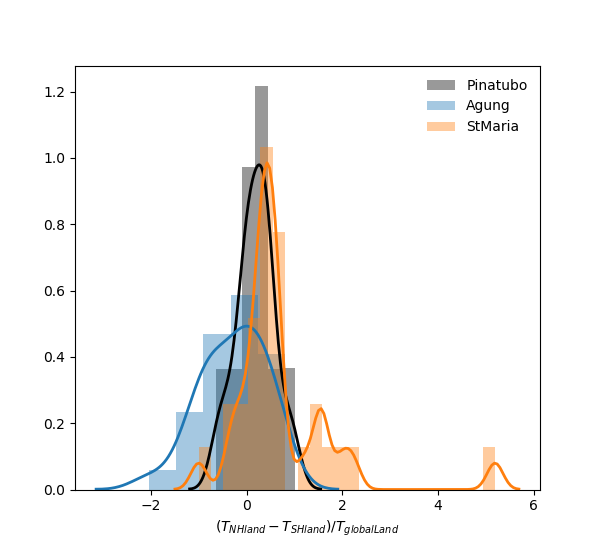

/tigress/wenchang/miniconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


In [7]:
# plot, land only, normalized by T_globalLand instead of <T_globalLand>
fig, ax = plt.subplots(figsize=(6, 5.5))
alpha = .5
n_years = 5
# bins = np.arange()
# xmin, xmax = -2, 0
# ymin, ymax = -6.5, 0

# 
volc = 'Pinatubo'
color = 'k'

dataname = 't_surf'
keyv, keyc = f'{volc}_{dataname}', f'{volc}_ctl_{dataname}'
da = ( das[keyv+'_land'] - das[keyc+'_land'] ).isel(time=slice(0, n_years*12)).sum('time')/12
da_nh = ( das[keyv+'_nhland'] - das[keyc+'_nhland'] ).isel(time=slice(0, n_years*12)).sum('time')/12
da_sh = ( das[keyv+'_shland'] - das[keyc+'_shland'] ).isel(time=slice(0, n_years*12)).sum('time')/12
da = (da_nh - da_sh)/da

# da.plot.hist(color=color, alpha=alpha)
sns.distplot(da, color=color, label=volc)

volc = 'Agung'
color = 'k'

dataname = 't_surf'
keyv, keyc = f'{volc}_{dataname}', f'{volc}_ctl_{dataname}'
da = ( das[keyv+'_land'] - das[keyc+'_land'] ).isel(time=slice(0, n_years*12)).sum('time')/12
da_nh = ( das[keyv+'_nhland'] - das[keyc+'_nhland'] ).isel(time=slice(0, n_years*12)).sum('time')/12
da_sh = ( das[keyv+'_shland'] - das[keyc+'_shland'] ).isel(time=slice(0, n_years*12)).sum('time')/12
da = (da_nh - da_sh)/da

# da.plot.hist(alpha=alpha)
sns.distplot(da, label=volc)


volc = 'StMaria'
color = 'k'

dataname = 't_surf'
keyv, keyc = f'{volc}_{dataname}', f'{volc}_ctl_{dataname}'
da = ( das[keyv+'_land'] - das[keyc+'_land'] ).isel(time=slice(0, n_years*12)).sum('time')/12
da_nh = ( das[keyv+'_nhland'] - das[keyc+'_nhland'] ).isel(time=slice(0, n_years*12)).sum('time')/12
da_sh = ( das[keyv+'_shland'] - das[keyc+'_shland'] ).isel(time=slice(0, n_years*12)).sum('time')/12
da = (da_nh - da_sh)/da

# da.plot.hist(alpha=alpha)
sns.distplot(da, label=volc)

ax.autoscale()
plt.legend()
s = '$(T_{NHland} - T_{SHland})/T_{globalLand}$'
plt.xlabel(s)

figname = f'figs/fig_scatter_NF_vs_Ts_years1to{n_years}.pdf'
# plt.savefig(figname)

### asymmetry index: Prcp

<IPython.core.display.Javascript object>


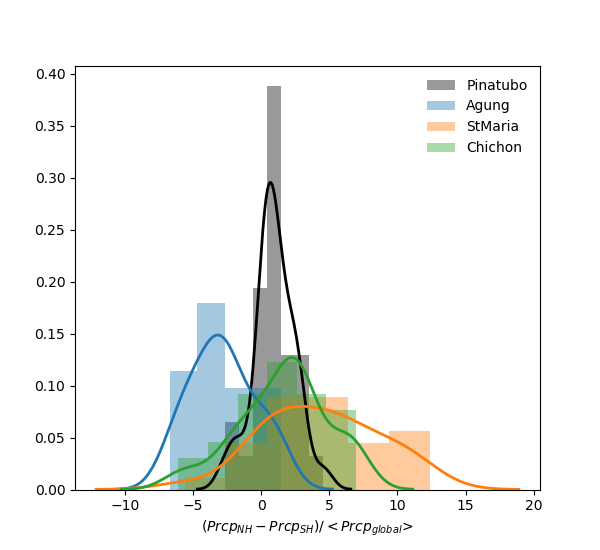

/tigress/wenchang/miniconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


In [44]:
# plot
fig, ax = plt.subplots(figsize=(6, 5.5))
dataname = 'precip'
alpha = 1
n_years = 5
bins = np.arange(-7.4, 12.6, 1)
# xmin, xmax = -2, 0
# ymin, ymax = -6.5, 0
histtype = 'step'
stacked = False
# 
volc = 'Pinatubo'
color = 'k'

keyv, keyc = f'{volc}_{dataname}', f'{volc}_ctl_{dataname}'
da = ( das[keyv] - das[keyc] ).isel(time=slice(0, n_years*12)).sum('time')/12
da_nh = ( das[keyv+'_nh'] - das[keyc+'_nh'] ).isel(time=slice(0, n_years*12)).sum('time')/12
da_sh = ( das[keyv+'_sh'] - das[keyc+'_sh'] ).isel(time=slice(0, n_years*12)).sum('time')/12
da = (da_nh - da_sh)/da.mean() 

sns.distplot(da, color=color, label=volc)

volc = 'Agung'

keyv, keyc = f'{volc}_{dataname}', f'{volc}_ctl_{dataname}'
da = ( das[keyv] - das[keyc] ).isel(time=slice(0, n_years*12)).sum('time')/12
da_nh = ( das[keyv+'_nh'] - das[keyc+'_nh'] ).isel(time=slice(0, n_years*12)).sum('time')/12
da_sh = ( das[keyv+'_sh'] - das[keyc+'_sh'] ).isel(time=slice(0, n_years*12)).sum('time')/12
da = (da_nh - da_sh)/da.mean() 

sns.distplot(da, label=volc)



volc = 'StMaria'

keyv, keyc = f'{volc}_{dataname}', f'{volc}_ctl_{dataname}'
da = ( das[keyv] - das[keyc] ).isel(time=slice(0, n_years*12)).sum('time')/12
da_nh = ( das[keyv+'_nh'] - das[keyc+'_nh'] ).isel(time=slice(0, n_years*12)).sum('time')/12
da_sh = ( das[keyv+'_sh'] - das[keyc+'_sh'] ).isel(time=slice(0, n_years*12)).sum('time')/12
da = (da_nh - da_sh)/da.mean() 

sns.distplot(da, label=volc)

volc = 'Chichon'

keyv, keyc = f'{volc}_{dataname}', f'{volc}_ctl_{dataname}'
da = ( das[keyv] - das[keyc] ).isel(time=slice(0, n_years*12)).sum('time')/12
da_nh = ( das[keyv+'_nh'] - das[keyc+'_nh'] ).isel(time=slice(0, n_years*12)).sum('time')/12
da_sh = ( das[keyv+'_sh'] - das[keyc+'_sh'] ).isel(time=slice(0, n_years*12)).sum('time')/12
da = (da_nh - da_sh)/da.mean() 

sns.distplot(da, label=volc)

ax.autoscale()
plt.legend()
s = '$(Prcp_{NH} - Prcp_{SH})/<Prcp_{global}$>'
plt.xlabel(s)

figname = f'figs/fig_scatter_NF_vs_Ts_years1to{n_years}.pdf'
# plt.savefig(figname)

<IPython.core.display.Javascript object>


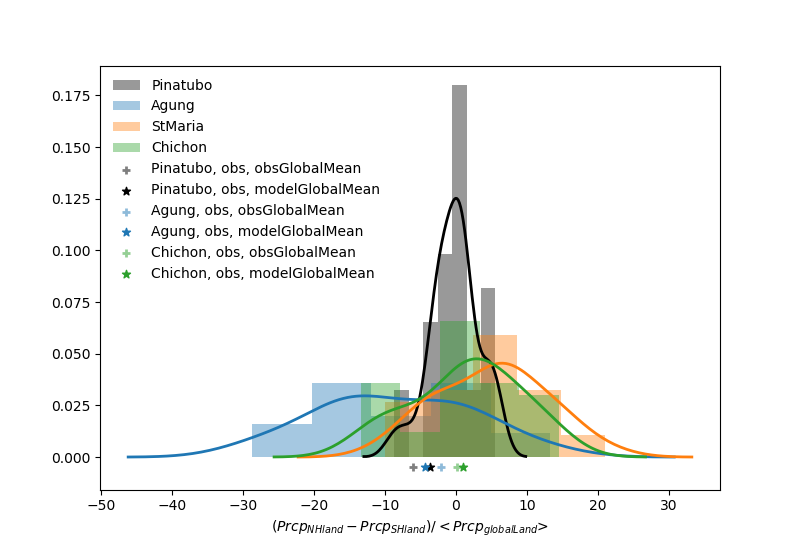

/tigress/wenchang/miniconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/tigress/wenchang/miniconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/tigress/wenchang/miniconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional i

Text(0.5,0,'$(Prcp_{NHland} - Prcp_{SHland})/<Prcp_{globalLand}$>')

In [95]:
# plot: land only
fig, ax = plt.subplots(figsize=(8, 5.5))
dataname = 'precip'
alpha = 0.5
n_years = 5
bins = np.arange(-7.4, 12.6, 1)
# xmin, xmax = -2, 0
# ymin, ymax = -6.5, 0
histtype = 'step'
stacked = False
# 
volc = 'Pinatubo'
color = 'k'

keyv, keyc = f'{volc}_{dataname}', f'{volc}_ctl_{dataname}'
da_g = ( das[keyv+'_land'] - das[keyc+'_land'] ).isel(time=slice(0, n_years*12)).sum('time')/12
da_nh = ( das[keyv+'_nhland'] - das[keyc+'_nhland'] ).isel(time=slice(0, n_years*12)).sum('time')/12
da_sh = ( das[keyv+'_shland'] - das[keyc+'_shland'] ).isel(time=slice(0, n_years*12)).sum('time')/12
da = (da_nh - da_sh)/da_g.mean() 

sns.distplot(da, color=color, label=volc)
# plt.axvline(da.mean(), color=color, ls='--', alpha=alpha)
da_obs, year = das['cru_pra_res'], 1991
asymi = cal_asym_index(da_obs, year)
plt.scatter(asymi, -0.005, marker='+', color=color, label=f'{volc}, obs, obsGlobalMean', alpha=alpha)
asymi = cal_asym_index(da_obs, year, global_mean=da_g.mean()*24*3600*30)
plt.scatter(asymi, -0.005, marker='*', color=color, label=f'{volc}, obs, modelGlobalMean')

volc = 'Agung'
color = 'C0'

keyv, keyc = f'{volc}_{dataname}', f'{volc}_ctl_{dataname}'
da_g = ( das[keyv+'_land'] - das[keyc+'_land'] ).isel(time=slice(0, n_years*12)).sum('time')/12
da_nh = ( das[keyv+'_nhland'] - das[keyc+'_nhland'] ).isel(time=slice(0, n_years*12)).sum('time')/12
da_sh = ( das[keyv+'_shland'] - das[keyc+'_shland'] ).isel(time=slice(0, n_years*12)).sum('time')/12
da = (da_nh - da_sh)/da_g.mean() 

sns.distplot(da, label=volc)
# plt.axvline(da.mean(), color=color, ls='--', alpha=alpha)
da_obs, year = das['cru_pra_res'], 1963
asymi = cal_asym_index(da_obs, year)
plt.scatter(asymi, -0.005, marker='+', color=color, label=f'{volc}, obs, obsGlobalMean', alpha=alpha)
asymi = cal_asym_index(da_obs, year, global_mean=da_g.mean()*24*3600*30)
plt.scatter(asymi, -0.005, marker='*', color=color, label=f'{volc}, obs, modelGlobalMean')


volc = 'StMaria'
color = 'C1'

keyv, keyc = f'{volc}_{dataname}', f'{volc}_ctl_{dataname}'
da_g = ( das[keyv+'_land'] - das[keyc+'_land'] ).isel(time=slice(0, n_years*12)).sum('time')/12
da_nh = ( das[keyv+'_nhland'] - das[keyc+'_nhland'] ).isel(time=slice(0, n_years*12)).sum('time')/12
da_sh = ( das[keyv+'_shland'] - das[keyc+'_shland'] ).isel(time=slice(0, n_years*12)).sum('time')/12
da = (da_nh - da_sh)/da_g.mean() 

sns.distplot(da, label=volc)
# plt.axvline(da.mean(), color=color, ls='--', alpha=alpha)
# da_obs, year = das['cru_pra_res'], 1902
# asymi = cal_asym_index(da_obs, year)
# plt.scatter(asymi, 0, marker='x', color=color)
# asymi = cal_asym_index(da_obs, year, global_mean=da_g.mean()*24*3600*30)
# plt.scatter(asymi, 0, marker='+', color=color)

volc = 'Chichon'
color = 'C2'

keyv, keyc = f'{volc}_{dataname}', f'{volc}_ctl_{dataname}'
da_g = ( das[keyv+'_land'] - das[keyc+'_land'] ).isel(time=slice(0, n_years*12)).sum('time')/12
da_nh = ( das[keyv+'_nhland'] - das[keyc+'_nhland'] ).isel(time=slice(0, n_years*12)).sum('time')/12
da_sh = ( das[keyv+'_shland'] - das[keyc+'_shland'] ).isel(time=slice(0, n_years*12)).sum('time')/12
da = (da_nh - da_sh)/da_g.mean() 

sns.distplot(da, label=volc)
# plt.axvline(da.mean(), color=color, ls='--', alpha=alpha)
da_obs, year = das['cru_pra_res'], 1982
asymi = cal_asym_index(da_obs, year)
plt.scatter(asymi, -0.005, marker='+', color=color, label=f'{volc}, obs, obsGlobalMean', alpha=alpha)
asymi = cal_asym_index(da_obs, year, global_mean=da_g.mean()*24*3600*30)
plt.scatter(asymi, -0.005, marker='*', color=color, label=f'{volc}, obs, modelGlobalMean')

ax.autoscale()
plt.legend()
s = '$(Prcp_{NHland} - Prcp_{SHland})/<Prcp_{globalLand}$>'
plt.xlabel(s)

# figname = f'figs/fig_scatter_NF_vs_Ts_years1to{n_years}.pdf'
# plt.savefig(figname)

<IPython.core.display.Javascript object>


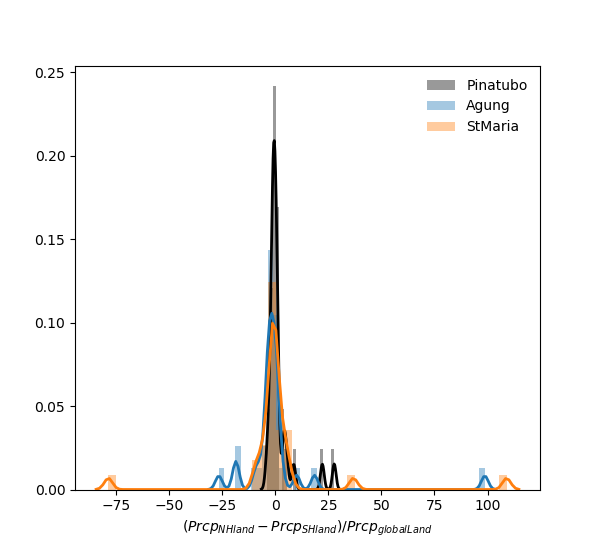

/tigress/wenchang/miniconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


In [10]:
# plot: land only, normalized by Prcp_globalLand instead of <Prcp_globalLand>
fig, ax = plt.subplots(figsize=(6, 5.5))
dataname = 'precip'
alpha = 1
n_years = 5
bins = np.arange(-7.4, 12.6, 1)
# xmin, xmax = -2, 0
# ymin, ymax = -6.5, 0
histtype = 'step'
stacked = False
# 
volc = 'Pinatubo'
color = 'k'

keyv, keyc = f'{volc}_{dataname}', f'{volc}_ctl_{dataname}'
da = ( das[keyv+'_land'] - das[keyc+'_land'] ).isel(time=slice(0, n_years*12)).sum('time')/12
da_nh = ( das[keyv+'_nhland'] - das[keyc+'_nhland'] ).isel(time=slice(0, n_years*12)).sum('time')/12
da_sh = ( das[keyv+'_shland'] - das[keyc+'_shland'] ).isel(time=slice(0, n_years*12)).sum('time')/12
da = (da_nh - da_sh)/da

sns.distplot(da, color=color, label=volc)

volc = 'Agung'

keyv, keyc = f'{volc}_{dataname}', f'{volc}_ctl_{dataname}'
da = ( das[keyv+'_land'] - das[keyc+'_land'] ).isel(time=slice(0, n_years*12)).sum('time')/12
da_nh = ( das[keyv+'_nhland'] - das[keyc+'_nhland'] ).isel(time=slice(0, n_years*12)).sum('time')/12
da_sh = ( das[keyv+'_shland'] - das[keyc+'_shland'] ).isel(time=slice(0, n_years*12)).sum('time')/12
da = (da_nh - da_sh)/da

sns.distplot(da, label=volc)



volc = 'StMaria'

keyv, keyc = f'{volc}_{dataname}', f'{volc}_ctl_{dataname}'
da = ( das[keyv+'_land'] - das[keyc+'_land'] ).isel(time=slice(0, n_years*12)).sum('time')/12
da_nh = ( das[keyv+'_nhland'] - das[keyc+'_nhland'] ).isel(time=slice(0, n_years*12)).sum('time')/12
da_sh = ( das[keyv+'_shland'] - das[keyc+'_shland'] ).isel(time=slice(0, n_years*12)).sum('time')/12
da = (da_nh - da_sh)/da

sns.distplot(da, label=volc)

ax.autoscale()
plt.legend()
s = '$(Prcp_{NHland} - Prcp_{SHland})/Prcp_{globalLand}$'
plt.xlabel(s)

figname = f'figs/fig_scatter_NF_vs_Ts_years1to{n_years}.pdf'
# plt.savefig(figname)

### global mean

<IPython.core.display.Javascript object>


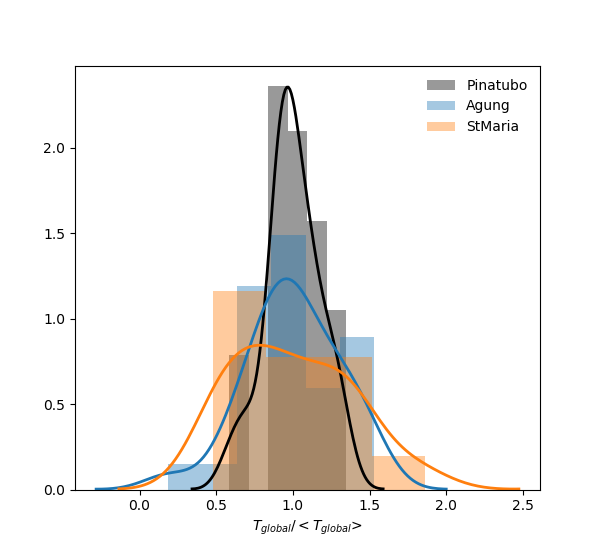

/tigress/wenchang/miniconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,0,'$T_{global}/<T_{global}$>')

In [11]:
# plot, Ts
fig, ax = plt.subplots(figsize=(6, 5.5))
alpha = .5
n_years = 5
# bins = np.arange()
# xmin, xmax = -2, 0
# ymin, ymax = -6.5, 0

# 
dataname = 't_surf'
color = 'k'

volc = 'Pinatubo'
keyv, keyc = f'{volc}_{dataname}', f'{volc}_ctl_{dataname}'
da = ( das[keyv] - das[keyc] ).isel(time=slice(0, n_years*12)).sum('time')/12
da_nh = ( das[keyv+'_nh'] - das[keyc+'_nh'] ).isel(time=slice(0, n_years*12)).sum('time')/12
da_sh = ( das[keyv+'_sh'] - das[keyc+'_sh'] ).isel(time=slice(0, n_years*12)).sum('time')/12
da = da/da.mean()

sns.distplot(da, color=color, label=volc)

volc = 'Agung'
keyv, keyc = f'{volc}_{dataname}', f'{volc}_ctl_{dataname}'
da = ( das[keyv] - das[keyc] ).isel(time=slice(0, n_years*12)).sum('time')/12
da_nh = ( das[keyv+'_nh'] - das[keyc+'_nh'] ).isel(time=slice(0, n_years*12)).sum('time')/12
da_sh = ( das[keyv+'_sh'] - das[keyc+'_sh'] ).isel(time=slice(0, n_years*12)).sum('time')/12
da = da/da.mean()

sns.distplot(da, label=volc)

volc = 'StMaria'
keyv, keyc = f'{volc}_{dataname}', f'{volc}_ctl_{dataname}'
da = ( das[keyv] - das[keyc] ).isel(time=slice(0, n_years*12)).sum('time')/12
da_nh = ( das[keyv+'_nh'] - das[keyc+'_nh'] ).isel(time=slice(0, n_years*12)).sum('time')/12
da_sh = ( das[keyv+'_sh'] - das[keyc+'_sh'] ).isel(time=slice(0, n_years*12)).sum('time')/12
da = da/da.mean()

sns.distplot(da, label=volc)


ax.autoscale()
plt.legend()
s = '$T_{global}/<T_{global}$>'
plt.xlabel(s)


<IPython.core.display.Javascript object>


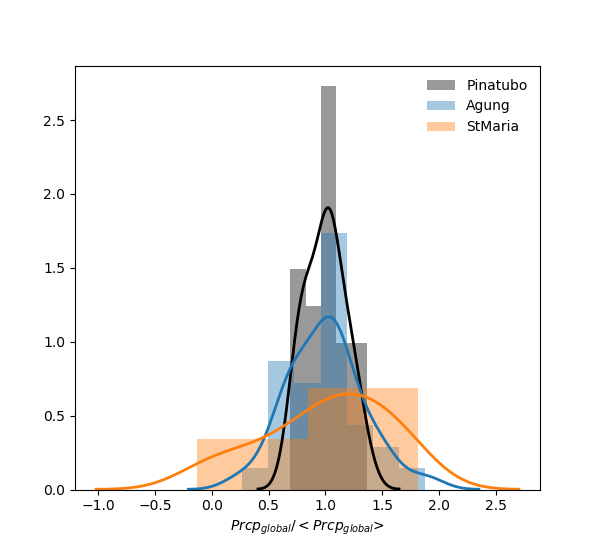

/tigress/wenchang/miniconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,0,'$Prcp_{global}/<Prcp_{global}$>')

In [131]:
# plot, precip
fig, ax = plt.subplots(figsize=(6, 5.5))
alpha = .5
n_years = 5
# bins = np.arange()
# xmin, xmax = -2, 0
# ymin, ymax = -6.5, 0

# 
dataname = 'precip'
color = 'k'

volc = 'Pinatubo'
keyv, keyc = f'{volc}_{dataname}', f'{volc}_ctl_{dataname}'
da = ( das[keyv] - das[keyc] ).isel(time=slice(0, n_years*12)).sum('time')/12
da_nh = ( das[keyv+'_nh'] - das[keyc+'_nh'] ).isel(time=slice(0, n_years*12)).sum('time')/12
da_sh = ( das[keyv+'_sh'] - das[keyc+'_sh'] ).isel(time=slice(0, n_years*12)).sum('time')/12
da = da/da.mean()

sns.distplot(da, color=color, label=volc)

volc = 'Agung'
keyv, keyc = f'{volc}_{dataname}', f'{volc}_ctl_{dataname}'
da = ( das[keyv] - das[keyc] ).isel(time=slice(0, n_years*12)).sum('time')/12
da_nh = ( das[keyv+'_nh'] - das[keyc+'_nh'] ).isel(time=slice(0, n_years*12)).sum('time')/12
da_sh = ( das[keyv+'_sh'] - das[keyc+'_sh'] ).isel(time=slice(0, n_years*12)).sum('time')/12
da = da/da.mean()

sns.distplot(da, label=volc)

volc = 'StMaria'
keyv, keyc = f'{volc}_{dataname}', f'{volc}_ctl_{dataname}'
da = ( das[keyv] - das[keyc] ).isel(time=slice(0, n_years*12)).sum('time')/12
da_nh = ( das[keyv+'_nh'] - das[keyc+'_nh'] ).isel(time=slice(0, n_years*12)).sum('time')/12
da_sh = ( das[keyv+'_sh'] - das[keyc+'_sh'] ).isel(time=slice(0, n_years*12)).sum('time')/12
da = da/da.mean()

sns.distplot(da, label=volc)


ax.autoscale()
plt.legend()
s = '$Prcp_{global}/<Prcp_{global}$>'
plt.xlabel(s)


<IPython.core.display.Javascript object>


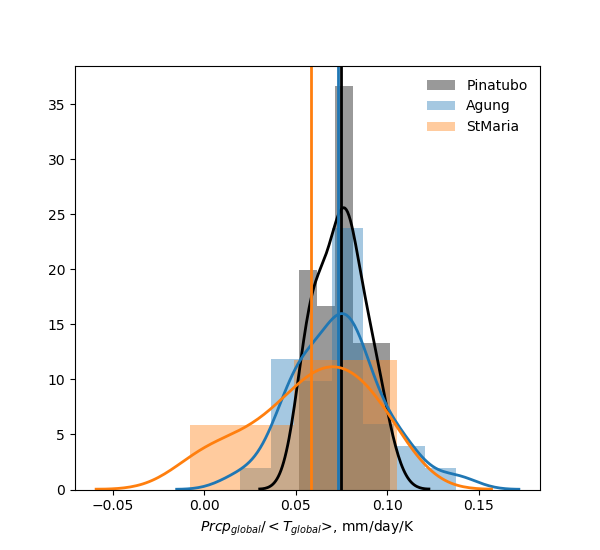

/tigress/wenchang/miniconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,0,'$Prcp_{global}/<T_{global}$>, mm/day/K')

In [130]:
# plot, precip, normalized by <T_{global}>
fig, ax = plt.subplots(figsize=(6, 5.5))
alpha = .5
n_years = 5
# bins = np.arange()
# xmin, xmax = -2, 0
# ymin, ymax = -6.5, 0

# 
dataname = 'precip'
color = 'k'

volc = 'Pinatubo'
keyv, keyc = f'{volc}_{dataname}', f'{volc}_ctl_{dataname}'
da = ( das[keyv] - das[keyc] ).isel(time=slice(0, n_years*12)).sum('time')/12*24*3600
da_ = ( das[keyv.replace(dataname, 't_surf')] - das[keyc.replace(dataname, 't_surf')] ).isel(time=slice(0, n_years*12)).sum('time')/12
da = da/da_.mean()

sns.distplot(da, color=color, label=volc)
plt.axvline(da.mean(), color=color)

volc = 'Agung'
keyv, keyc = f'{volc}_{dataname}', f'{volc}_ctl_{dataname}'
da = ( das[keyv] - das[keyc] ).isel(time=slice(0, n_years*12)).sum('time')/12*24*3600
da_ = ( das[keyv.replace(dataname, 't_surf')] - das[keyc.replace(dataname, 't_surf')] ).isel(time=slice(0, n_years*12)).sum('time')/12
da = da/da_.mean()

sns.distplot(da, label=volc)
plt.axvline(da.mean(), color='C0')

volc = 'StMaria'
keyv, keyc = f'{volc}_{dataname}', f'{volc}_ctl_{dataname}'
da = ( das[keyv] - das[keyc] ).isel(time=slice(0, n_years*12)).sum('time')/12*24*3600
da_ = ( das[keyv.replace(dataname, 't_surf')] - das[keyc.replace(dataname, 't_surf')] ).isel(time=slice(0, n_years*12)).sum('time')/12
da = da/da_.mean()

sns.distplot(da, label=volc)
plt.axvline(da.mean(), color='C1')


ax.autoscale()
plt.legend()
s = '$Prcp_{global}/<T_{global}$>, mm/day/K'
plt.xlabel(s)


In [99]:
%%html
<script src="https://cdn.rawgit.com/parente/4c3e6936d0d7a46fd071/raw/65b816fb9bdd3c28b4ddf3af602bfd6015486383/code_toggle.js">
</script>